Initializing fast loader: https://storage.googleapis.com/scrna-seqbrowser/relaxed_epdsc_annotated_data_csc_full.zarr 
📁 Detected Zarr format - using fast Zarr loader
🌐 Loading from URL...
⏱ Zarr store opening took: 0.125 seconds
🔍 Exploring Zarr structure...
📋 Top-level groups: var, varp, layers, X, uns, raw, obsp, obs, obsm, varm 
⚠️ Could not determine dataset shape from X array
⏱ Fast UMAP loading took: 0.008 seconds
🔍 Available var attributes: mean_counts, highly_variable, dispersions_norm, means, ambient_expression, n_raw, dispersions, gene_id, n_cellbender, cellbender_analyzed, n_cells, n_cells_by_counts, total_counts, excluded, _index, pct_dropout_by_counts 
✅ Found var index using key: _index 
⏱ Gene info loading took: 0.216 seconds
🔍 Available obs columns: Time, log_lib_size_raw_noExcluded, cluster_feature, pheno, percent_mito, pheno_65, doublet_hypothesis_probability, Replicate, Y1_CTRL_2, pheno_95 ... 
🔑 Available obs columns: Time, log_lib_size_raw_noExcluded, cluster_featu

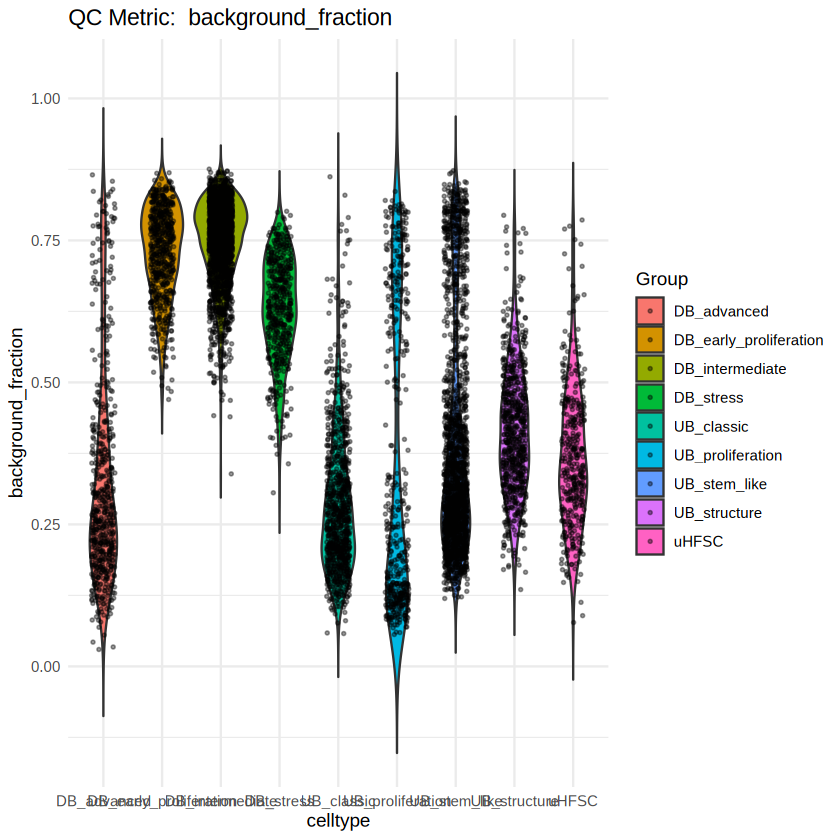

In [5]:
# Load required libraries
library(ggplot2)

# Load analysis functions
source('https://raw.githubusercontent.com/george123ya/scRNAseq_Visualizer/main/modules/reproducible_functions.R')

# Initialize data connection
zarr_file <- 'https://storage.googleapis.com/scrna-seqbrowser/relaxed_epdsc_annotated_data_csc_full.zarr'  # or .h5ad file
lazy_data <- init_fast_zarr_h5ad(zarr_file)

# Prepare data for violin/box/histogram plot
metric <- as.numeric(lazy_data$get_obs_column(lazy_data$z, "background_fraction"))
group <- as.factor(lazy_data$get_obs_column(lazy_data$z, "celltype"))
dat <- data.frame(Metric = metric, Group = group)
if( TRUE  && nrow(dat) > 20000) {
  set.seed(123)
  dat_points <- dat[sample(nrow(dat), 20000), ]
} else {
  dat_points <- dat
}

# Generate plot
p <- ggplot(dat, aes(x = Group, y = Metric, fill = Group)) +
  geom_violin(trim = FALSE)
p <- p + geom_jitter(data = dat_points, width = 0.2, alpha = 0.4, size =  0.5 )
p <- p + theme_minimal() +
  labs(title = "QC Metric:  background_fraction ",
       x = " celltype ",
       y = " background_fraction ")
# Display plot
print(p)